In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
dados=pd.read_csv('dados_exemplo.txt',sep='\t')
dados.head()

,consumo,temperatura,dias,pureza,producao
0,240,25,24,91,100
1,236,31,21,90,95
2,270,45,24,88,110
3,274,60,25,87,88
4,301,65,25,91,94


In [17]:

x=dados[['temperatura','dias','pureza','producao']]
y=dados['consumo']

In [18]:
dados.describe()

,consumo,temperatura,dias,pureza,producao
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,277.083333,57.083333,24.333333,89.333333,99.333333
std,24.444588,19.406926,1.302678,2.269695,6.429101
min,236.000000,25.000000,21.000000,86.000000,88.000000
25%,265.500000,43.250000,24.000000,87.750000,95.750000
50%,275.000000,60.000000,25.000000,89.500000,98.500000
75%,297.000000,72.750000,25.000000,91.000000,101.250000
max,316.000000,84.000000,26.000000,94.000000,110.000000


In [19]:
#matriz de corelação

correlation_matrix=dados.corr()
correlation_matrix

,consumo,temperatura,dias,pureza,producao
consumo,1.000000,0.802538,0.826963,0.092851,-0.132660
temperatura,0.802538,1.000000,0.660456,-0.287566,-0.023559
dias,0.826963,0.660456,1.000000,0.112739,-0.025328
pureza,0.092851,-0.287566,0.112739,1.000000,0.078914
producao,-0.132660,-0.023559,-0.025328,0.078914,1.000000


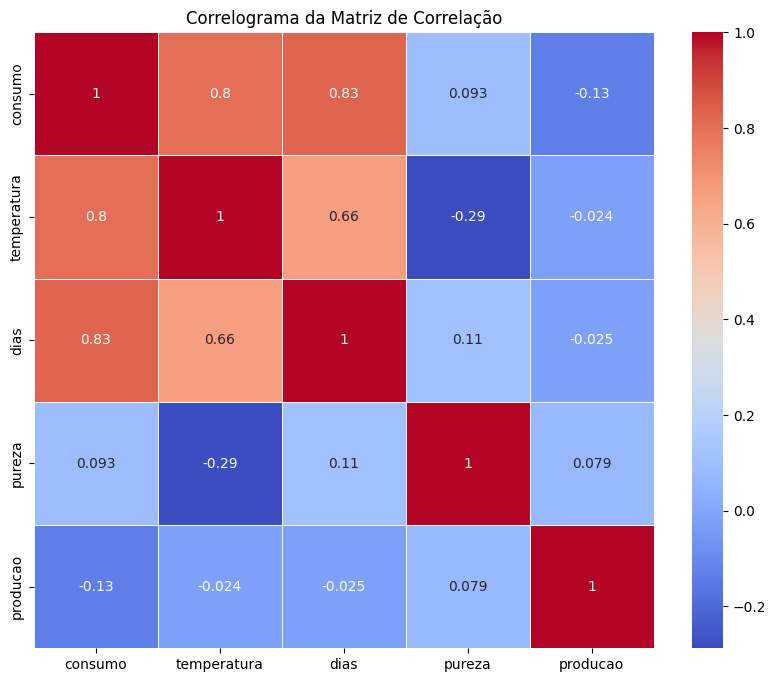

In [24]:
#Correlograma

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=.5)
plt.title('Correlograma da Matriz de Correlação')
plt.show()


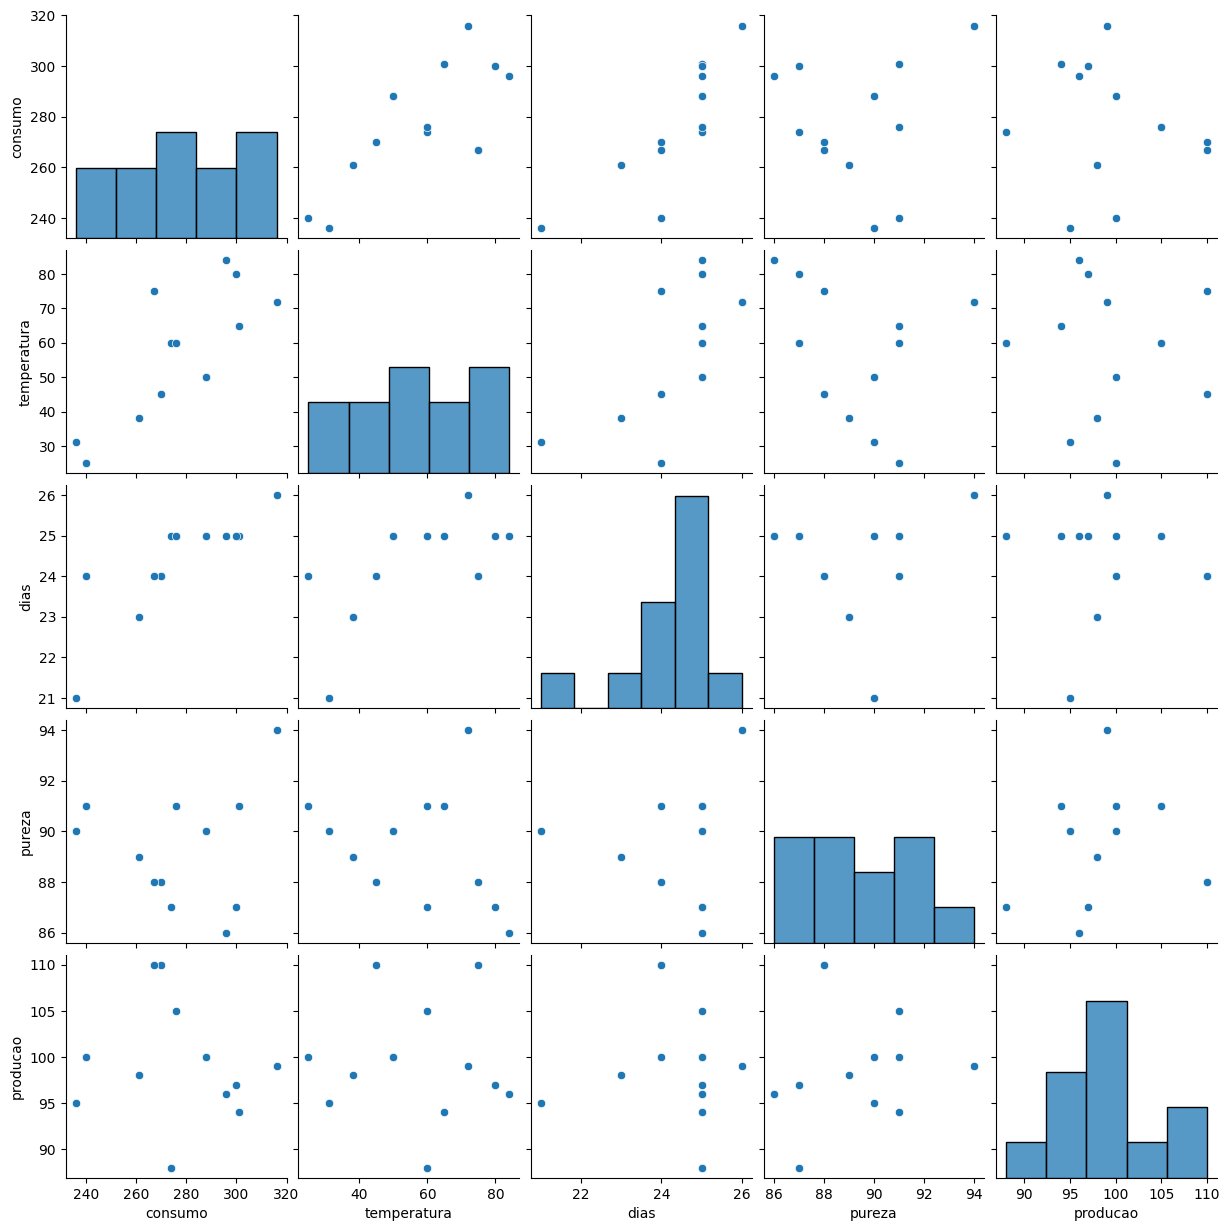

In [23]:
#Painel de scatter plots para cada par de colunas numéricas

sns.pairplot(dados)
plt.show()

In [26]:
#modelo de regressao linear Múltipla

import statsmodels.api as sm

x=sm.add_constant(x)
mod1=sm.OLS(y,x).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     10.08
Date:                Thu, 20 Nov 2025   Prob (F-statistic):            0.00496
Time:                        18:22:49   Log-Likelihood:                -43.397
No. Observations:                  12   AIC:                             96.79
Df Residuals:                       7   BIC:                             99.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -123.1312    157.256     -0.783      

In [28]:
import statsmodels.formula.api as smf

mod2=smf.ols(formula='consumo~temperatura+dias+pureza+producao',data=dados).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     10.08
Date:                Thu, 20 Nov 2025   Prob (F-statistic):            0.00496
Time:                        18:35:37   Log-Likelihood:                -43.397
No. Observations:                  12   AIC:                             96.79
Df Residuals:                       7   BIC:                             99.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -123.1312    157.256     -0.783      

In [30]:
#Acessando os elementos


print(mod2.rsquared)

0.8520498731784599


In [33]:
# Modelo de regressão linear simples
x2=dados['temperatura']
x2=sm.add_constant(x2)
mod2=sm.OLS(y,x2).fit()
print(mod2.summary())


                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     18.10
Date:                Thu, 20 Nov 2025   Prob (F-statistic):            0.00168
Time:                        18:46:28   Log-Likelihood:                -48.664
No. Observations:                  12   AIC:                             101.3
Df Residuals:                      10   BIC:                             102.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         219.3800     14.265     15.378      

In [36]:
## Predição de um novo valor

novo=pd.DataFrame({'const':[1],'temperatura':[51]})
mod2.predict(novo)

,0
0,270.933923
